In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(font_scale=1.3)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def data_counts(df):
    print("#Users:  ", df.userId.unique().size)
    print("#Items:  ", df.movieId.unique().size)
    print("#Records:", len(df))

# Load data

In [3]:
start = pd.to_datetime('2010-01-01')
end   = pd.to_datetime('2017-01-01')

In [5]:
df = pd.read_csv('../data/movielens/ratings.csv')
df['date'] = pd.to_datetime(df.timestamp, unit='s')
df.drop('timestamp', axis=1, inplace=True)
df = df.loc[(df.date >= start) & (df.date < end)]
df.sort_values(['userId', 'date'], inplace=True)
df.head()

,userId,movieId,rating,date
6,1,2762,4.5,2015-03-09 22:48:20
13,1,54503,3.5,2015-03-09 22:48:33
26,1,112552,5.0,2015-03-09 22:48:56
23,1,96821,5.0,2015-03-09 22:49:42
11,1,5577,5.0,2015-03-09 22:49:57


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7841546 entries, 6 to 26023915
Data columns (total 4 columns):
userId     int64
movieId    int64
rating     float64
date       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 299.1 MB


Count

In [7]:
data_counts(df)

#Users:   88993
#Items:   40431
#Records: 7841546


[Text(0,0.5,'#Users'), Text(0.5,0,'User ratings count')]

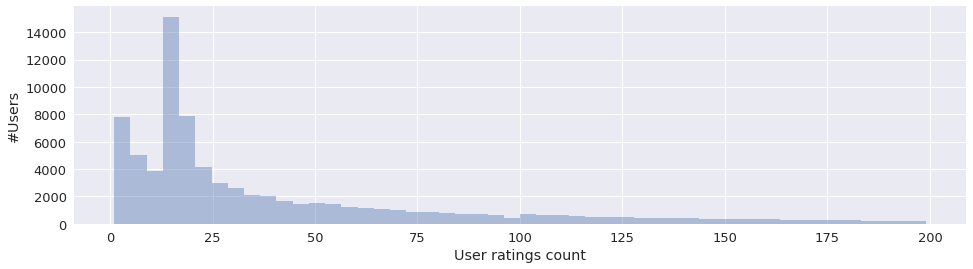

In [8]:
cnt = df.groupby('userId')['date'].count()
cnt_cut = cnt[cnt < 200]

fig, ax = plt.subplots(figsize=(16,4))

sns.distplot(cnt_cut.sort_values(), kde=False, bins=50, ax=ax)
del cnt_cut

ax.set(xlabel='User ratings count',
       ylabel='#Users')

([<matplotlib.patches.Wedge at 0x7f012d3f0b00>,
 [Text(0.276138,1.1678,'< 20'),
  Text(-0.605508,-0.918346,'20 ~ 200'),
  Text(0.971668,-0.515618,'200 ~ 400'),
  Text(1.08309,-0.19212,'400 ~ 800'),
  Text(1.19912,-0.0460783,'> 800')],
 [Text(0.161081,0.681214,'43%'),
  Text(-0.330277,-0.500916,'46%'),
  Text(0.530001,-0.281246,'7%'),
  Text(0.590778,-0.104793,'3%'),
  Text(0.699484,-0.026879,'1%')])

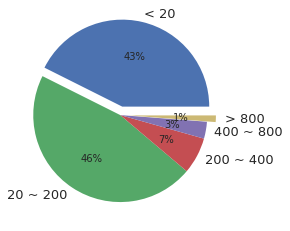

In [10]:
# User rating percentage
a = len(cnt[cnt < 20])
b = len(cnt[cnt < 200])
c = len(cnt[cnt < 400])
d = len(cnt[cnt < 800])
e = len(cnt)

fracs = a, b-a, c-b, d-c, e-d
labels = ['< 20', '20 ~ 200', '200 ~ 400', '400 ~ 800', '> 800']
explode = [0.1, 0, 0, 0, 0.1]
plt.subplot(aspect=1)
plt.pie(x=fracs, labels=labels, explode=explode,
        autopct='%.0f%%')

# Extract data

In [11]:
selected_users = cnt[(cnt>=20) & (cnt<=800)].index
df_cut = df.loc[df.userId.isin(selected_users)]
df_cut = df_cut.sort_values(['userId', 'date'])

In [15]:
data_counts(df_cut)

#Users:   44176
#Items:   34938
#Records: 4664303


In [16]:
df_cut.to_csv("interactions.csv", columns=['userId', 'movieId'], index=False)